# Principal Component Analysis (PCA):-

In [1]:
#Import linbray:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import ML library:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Example data (Iris) datasets:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [5]:
x = iris.data
y = iris.target

In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Standardizing the features:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
#Applying PCA model:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

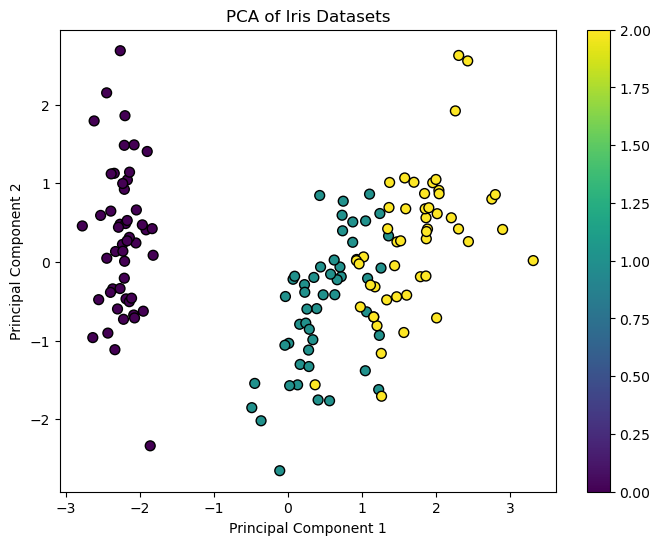

In [11]:
# Plotting the principal components;
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap="viridis", edgecolors="k", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Datasets")
plt.colorbar()
plt.show()

In [14]:
#Explained variance:
exp_variance = pca.explained_variance_ratio_
print(f"ùêÑùê±ùê©ùê•ùêöùê¢ùêßùêûùêù ùêïùêöùê´ùê¢ùêöùêßùêúùêû ùêõùê≤ ùêÇùê®ùê¶ùê©ùê®ùêßùêöùêßùê≠ ùüè: {exp_variance[0]:2f}")
print(f"ùêÑùê±ùê©ùê•ùêöùê¢ùêßùêûùêù ùêïùêöùê´ùê¢ùêöùêßùêúùêû ùêõùê≤ ùêÇùê®ùê¶ùê©ùê®ùêßùêöùêßùê≠ ùüê: {exp_variance[1]:2f}")

ùêÑùê±ùê©ùê•ùêöùê¢ùêßùêûùêù ùêïùêöùê´ùê¢ùêöùêßùêúùêû ùêõùê≤ ùêÇùê®ùê¶ùê©ùê®ùêßùêöùêßùê≠ ùüè: 0.729624
ùêÑùê±ùê©ùê•ùêöùê¢ùêßùêûùêù ùêïùêöùê´ùê¢ùêöùêßùêúùêû ùêõùê≤ ùêÇùê®ùê¶ùê©ùê®ùêßùêöùêßùê≠ ùüê: 0.228508


# Summary :-

ùêèùêÇùêÄ ùêÇùê®ùêßùêúùêûùê©ùê≠ : Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a large set of correlated features into a smaller set of uncorrelated features called principal components. These principal components capture the maximum variance in the data while reducing the dimensionality.

ùêìùê°ùêû ùê¨ùê≠ùêûùê©ùê¨ ùê¢ùêßùêØùê®ùê•ùêØùêûùêù ùê¢ùêß ùêèùêÇùêÄ ùêöùê´ùêû:
- Standardization: Normalize the data to have zero mean and unit variance.
- Covariance Matrix Computation: Compute the covariance matrix of the features.
- Eigenvalue and Eigenvector Decomposition: Compute the eigenvalues and eigenvectors of the covariance matrix.
- Principal Components Selection: Select the top \(k\) eigenvectors corresponding to the largest eigenvalues to form the principal components.
- Transformation: Project the original data onto the new subspace formed by the selected principal components.

ùêÅùêûùêßùêûùêüùê¢ùê≠ùê¨ ùê®ùêü ùêèùêÇùêÄ:
- ùêëùêûùêùùêÆùêúùêûùê¨ ùêÉùê¢ùê¶ùêûùêßùê¨ùê¢ùê®ùêßùêöùê•ùê¢ùê≠ùê≤: Simplifies the dataset by reducing the number of features.
- ùêàùê¶ùê©ùê´ùê®ùêØùêûùê¨ ùêèùêûùê´ùêüùê®ùê´ùê¶ùêöùêßùêúùêû: Speeds up machine learning algorithms and reduces the risk of overfitting.
- ùêîùêßùêúùê®ùêØùêûùê´ùê¨ ùêáùê¢ùêùùêùùêûùêß ùêèùêöùê≠ùê≠ùêûùê´ùêßùê¨: Helps visualize the underlying structure of the data.